In [2]:
import numpy as np
import numba
import matplotlib.pyplot as plt


def get_new_walker(grid):
    while True:
        walker_x, walker_y = np.random.randint(0, len(grid), 2)
        if grid[walker_x, walker_y] == 1:
            continue
        else:
            return walker_x, walker_y

def walk(walker_x, walker_y, N, grid):
    direction = np.random.randint(0, 4)
    if direction == 0:
        walker_y+=1
    if direction == 1:
        walker_y-=1
    if direction == 2:
        walker_x+=1
    if direction == 3:
        walker_x-=1

    if walker_y >= N or walker_y < 0:
        walker_x, walker_y = get_new_walker(grid)
        return walk(walker_x, walker_y, N, grid)
    if walker_x >= N:
        walker_x = 0
    if walker_x < 0:
        walker_x = N-1

    return walker_x, walker_y

def next_to_structure(walker_x, walker_y, grid):
    if walker_y < len(grid) - 1:
        if grid[walker_x, walker_y + 1] == 1:
            return True
    if walker_y > 0:
        if grid[walker_x, walker_y - 1] == 1:
            return True
    if walker_x < len(grid) - 1:
        if grid[walker_x + 1, walker_y] == 1:
            return True
    if walker_x > 0:
        if grid[walker_x - 1, walker_y] == 1:
            return True
    return False

def dla_monte_carlo(N, num_walkers = 5, sticking_prob = 1):
    """DLA model using Monte Carlo simulation
    Args:
        N (int): lattice size
        num_walkers(int): number of walkers that will be used
    """
    print("DLA Monte Carlo model with N = {}.".format(N))
    print("")

    grid = np.zeros((N, N))
    struct_x = int(N/2)
    struct_y = 0
    grid[struct_x, struct_y] = 1

    for _ in range(num_walkers):
        walker_x, walker_y = get_new_walker(grid)
        stuck = False

        while not stuck:
            if next_to_structure(walker_x, walker_y, grid):
                if np.random.uniform(0, 1) < sticking_prob:
                    stuck = True
                    grid[walker_x, walker_y] = 1
            else:
                walker_x, walker_y = walk(walker_x, walker_y, N, grid)
    return grid

DLA Monte Carlo model with N = 50.



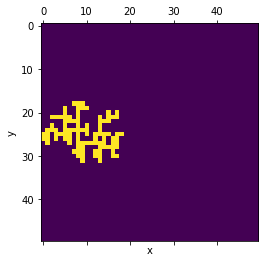

In [3]:
grid = dla_monte_carlo(50, 100)

fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(grid)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [17]:
import networkx as nx

def check_for_neighbours(row, col, grid, direction):
    """
    Looks in a specified direction if there is a neighbour   
    """
    if direction == "up" and (row - 1 > -1):
        return grid[row - 1, col] > 0
    if direction == "down" and (row + 1 < len(grid)):
        return grid[row + 1, col] > 0
    if direction == "right" and (col + 1 < len(grid)):
        return grid[row, col + 1] > 0
    if direction == "left" and (col - 1 > -1):
        return grid[row, col - 1] > 0
    return False

def get_network(grid, simplify = False):
    """
    Takes a grid of 1s and 0s and converts it into a network.
    Simply - removed nodes of degree 2.
    GRID HAS TO BE SQUARE.
    """
    # initialise network
    G=nx.Graph()
    node_number = 0
    nodes = []
    links = []
    pos = {}
    for row in range(len(grid)):
        for col in range(len(grid)):
            # update node number
            node_number += 1
            # check if there is anything in cell - if there is not, skip it completely to save time
            if grid[row][col] == 0:
                continue
            # add node to the list
            nodes.append(node_number)
            # get coordinates of the node
            coordinates  = (col, row * -1)

            pos[node_number] = coordinates
            # check for neighbors and if the neighbor exists add a link
            # check up
            if check_for_neighbours(row, col, grid, "up"):
                links.append((node_number, node_number - len(grid)))
            # check down
            if check_for_neighbours(row, col, grid, "down"):
                links.append((node_number, node_number + len(grid)))
            # check left
            if check_for_neighbours(row, col, grid, "left"):
                links.append((node_number, node_number - 1))
            # check down
            if check_for_neighbours(row, col, grid, "right"):
                links.append((node_number, node_number + 1))


    # add nodes to the graph
    G.add_nodes_from(nodes)
    # add links to the graph
    G.add_edges_from(links)

    if simplify:
        for node in list(G.nodes()):
            if G.degree(node) == 2:
                edges = list(G.edges(node))
                G.add_edge(edges[0][1], edges[1][1])
                G.remove_node(node)

    nx.draw(G, pos)
    return G


def get_average_degree(G):
    """
    Takes a graph G and returns average degree of the graph
    """
    degrees = G.degree()
    no_of_nodes = len(G)
    sum = 0
    for node in degrees:
        sum += node[1]
    return sum/no_of_nodes


DLA Monte Carlo model with N = 100.

2.208


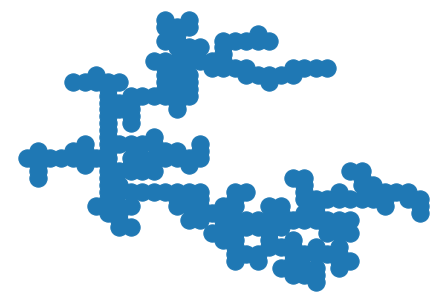

In [27]:
grid = dla_monte_carlo(100, 250, sticking_prob = 0.01)

G = get_network(grid, simplify = False)
print(get_average_degree(G))

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

DLA Monte Carlo model with N = 100.

D

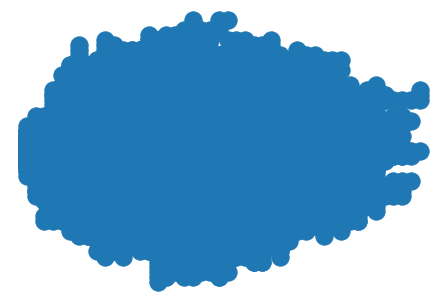

In [57]:
stick_list = [1, 0.9, 0.7, 0.5, 0.2, 0.1, 0.05, 0.01]
avg_degree_stick = [] #average degree of each stickness
for stick in stick_list:
    # For each stickness_prob Run 10 simulations
    avg_degree_sim =[] #average degree of each simulation
    
    for _ in range(10):
        grid = dla_monte_carlo(100, 250, sticking_prob = stick)
        G = get_network(grid, simplify = False)
        avg_degree_sim.append(get_average_degree(G))
    
    avg_degree_stick.append(np.mean(avg_degree_sim))

for i in range(len(stick_list)):
    print("Stickness prob = "+ str(stick_list[i])+", average degree = "+ str(avg_degree_stick[i]))


Text(0.5, 0, 'Stickness probability')

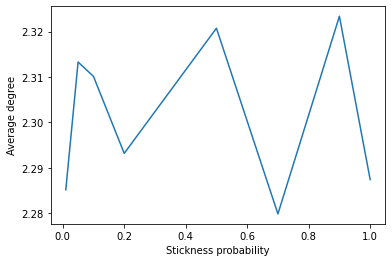

In [56]:
plt.plot(stick_list, avg_degree_stick)
plt.ylabel("Average degree")
plt.xlabel("Stickness probability")
